In [1]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv("train.csv")

In [33]:
#1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
#2
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
#3
df=df.dropna()
print(df)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [66]:
#4
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,164,164,164,164,164
unique,164,2,117,121,3
top,"Greenfield, Mr. William Bertram",male,113760,G6,S
freq,1,87,4,4,106


<AxesSubplot:>

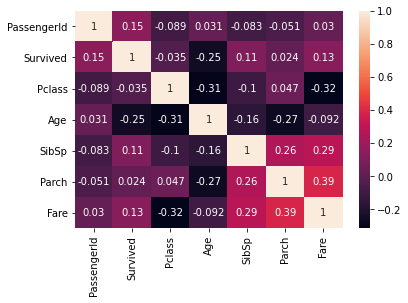

In [37]:
#5
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

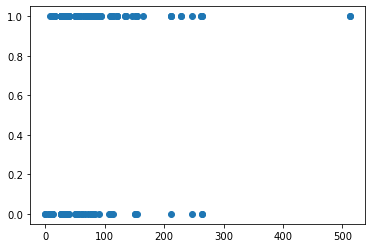

In [38]:
#6
import matplotlib.pyplot as plt
plt.scatter(df.Fare,df.Survived)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

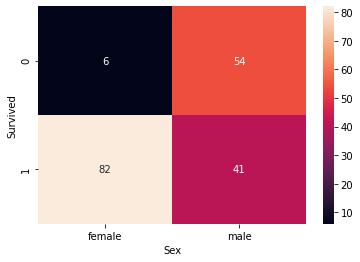

In [39]:
#7
sns.heatmap(pd.crosstab(df.Survived,df.Sex),annot=True)

<AxesSubplot:>

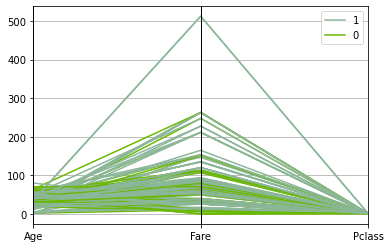

In [40]:
#8
pd.plotting.parallel_coordinates(df,'Survived',cols=['Age','Fare','Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

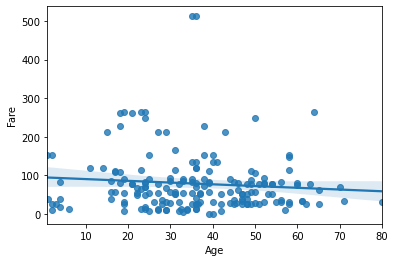

In [41]:
#9
sns.regplot(x=df.Age,y=df.Fare)

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

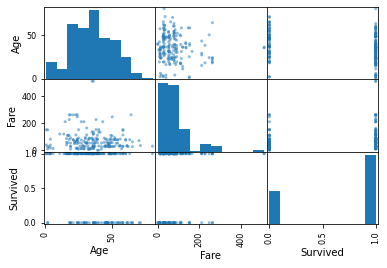

In [42]:
#10
pd.plotting.scatter_matrix(df[['Age','Fare','Survived']])

In [43]:
#11
pd.crosstab(df.Sex,df.Survived,normalize='index')
##OR
##niche walu nai thatu
#a=df[df.Sex=='male'].shape[0]
#b=df[(df.Sex=='male')&(df.Survived==1).shape(b/a)]

Survived,0,1
Sex,,
female,0.068182,0.931818
male,0.568421,0.431579


{'whiskers': [<matplotlib.lines.Line2D at 0x1156d753af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1156d7621f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1156d753790>,
 'medians': [<matplotlib.lines.Line2D at 0x1156d7628b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1156d762c10>,
 'means': []}

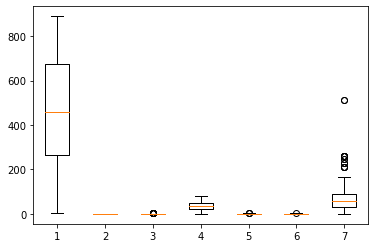

In [47]:
#12
plt.boxplot(df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']])



In [54]:
#13
Q1=df.Fare.quantile(0.25)
Q3=df.Fare.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q3-1.5*IQR
df=df[(df.Fare>=LL)&(df.Fare<=UL)]


{'whiskers': [<matplotlib.lines.Line2D at 0x1156d8efe50>,
 'caps': [<matplotlib.lines.Line2D at 0x1156d8fc550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1156d8efaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1156d8fcc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1156d8fcf70>],
 'means': []}

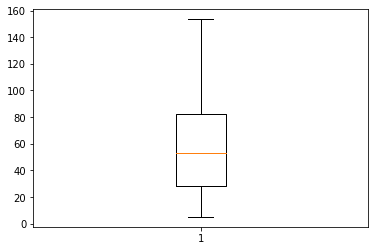

In [55]:
plt.boxplot(df.Fare)

In [58]:
#15
print(df[df.Pclass==1]['Fare'].sum())

9450.070900000002


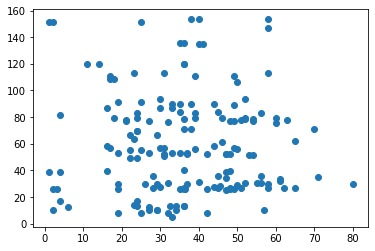

In [59]:
#16
plt.scatter(df.Age,df.Fare)

In [65]:
#14
import numpy as np
L=[]
for i in df.Age:
    if i<18:
        L.append('children')
    elif i<30:
        L.append('young')
    elif i<50:
        L.append('young Adult')
    elif i<100:
        L.append('Senior')
df.AgeGroup=np.array(L)
pd.crosstab(df.AgeGroup,df.Survived)

Survived,0,1
row_0,,
Senior,18,16
children,2,16
young,10,27
young Adult,24,51
